In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [514]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [515]:
df.shape

(1470, 35)

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [517]:
# checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [518]:
#checking duplicates values
df.duplicated().sum()

0

In [519]:
# that columns not give any information logical think 18+ person are allowed for job
# standard hours also have same value and working hours are fixed for all organization 
df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)

In [520]:
categorical_features=[features for features in df.columns if df[features].dtypes == 'O']
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [521]:
numerical_features=[features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [522]:
descreate_features=[features for features in numerical_features if len(df[features].unique())<25 ]
descreate_features

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [523]:
countinus_features=[features for features in numerical_features if features not in descreate_features and categorical_features]
countinus_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

In [524]:
for i in categorical_features:
    print('\n',df[i].value_counts())


 No     1233
Yes     237
Name: Attrition, dtype: int64

 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

 Male      882
Female    588
Name: Gender, dtype: int64

 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

 Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

 No     1054
Yes     416
Name: OverTime, dtype: int64


In [525]:
for i in descreate_features:
    print('\n',df[i].value_counts())


 3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

 3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

 3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

 4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

 1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

 11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

 3    1244
4     226
Name: PerformanceRating, dtype: int64

 3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

 0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

 2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: Training

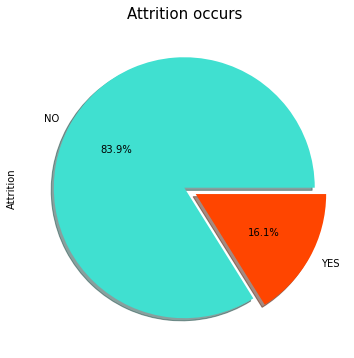

In [526]:
df['Attrition'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0,0.1],labels=['NO','YES'],shadow=True,figsize=(6,6),colors=['turquoise', 'orangered'])
plt.title('Attrition occurs',fontsize=15)
plt.show()


###### from the grapth see that attrition ration is very low or unbalanced dataset

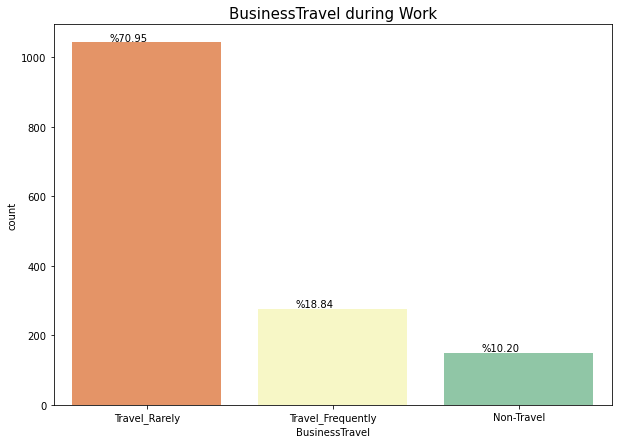

In [527]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='BusinessTravel',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x()+0.2, p.get_height()+5))
plt.title('BusinessTravel during Work',fontsize=15),
plt.show()

##### we see that on job rarely travel is major thing

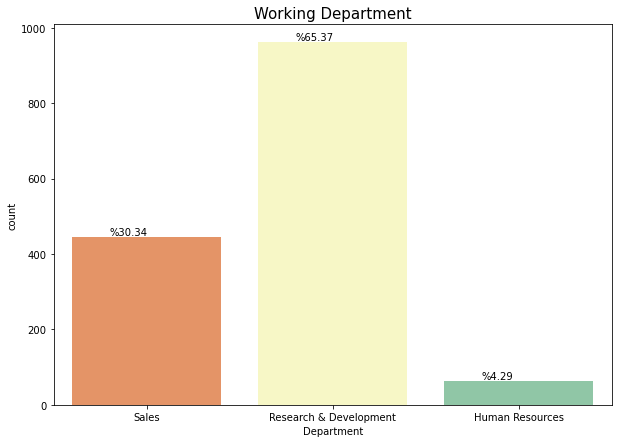

In [528]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Department',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x()+.2, p.get_height()+5))
plt.title('Working Department',fontsize=15),
plt.show()

##### highset working department is R&D and than Sales

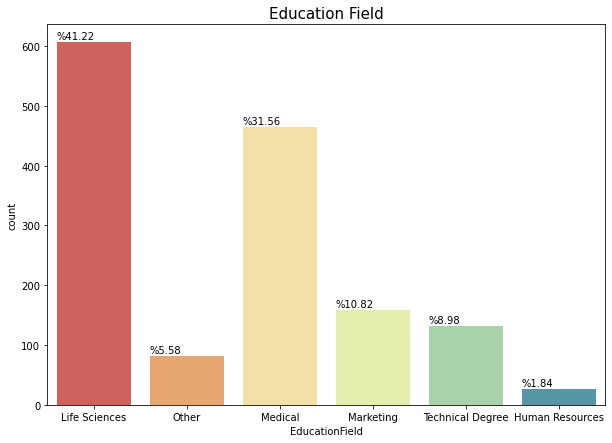

In [529]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='EducationField',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('Education Field',fontsize=15),
plt.show()

##### most of education field preffered is life science and Medical 41% and 32%
##### Than mrketing and technical with 11% and 9% respectively

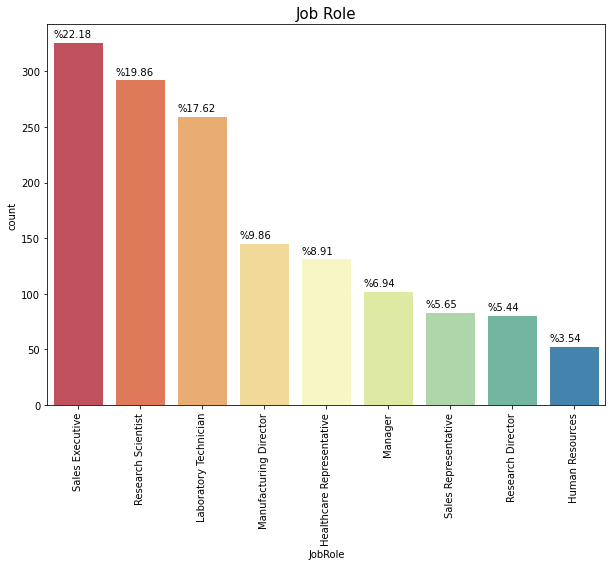

In [530]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='JobRole',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('Job Role',fontsize=15),
plt.xticks(rotation=90)
plt.show()

In [ ]:
#### most of people working in feilds like sales,research science,lab,Mfg 60% people
#### remaing 40% people working in other fields 

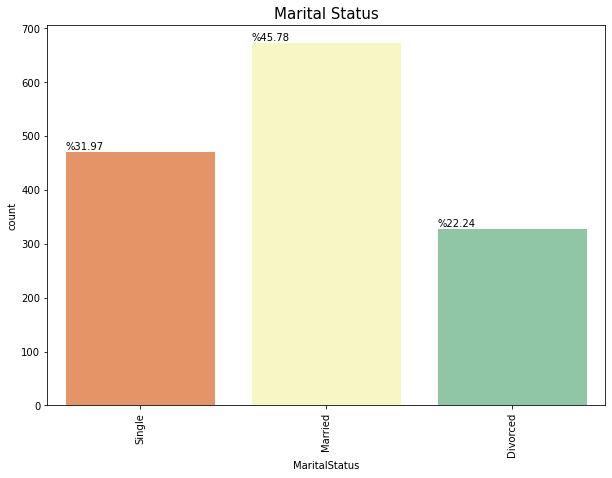

In [531]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='MaritalStatus',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('Marital Status',fontsize=15),
plt.xticks(rotation=90)
plt.show()

##### in marital status married people working ration 50%
##### other 50% working as single or Divorced

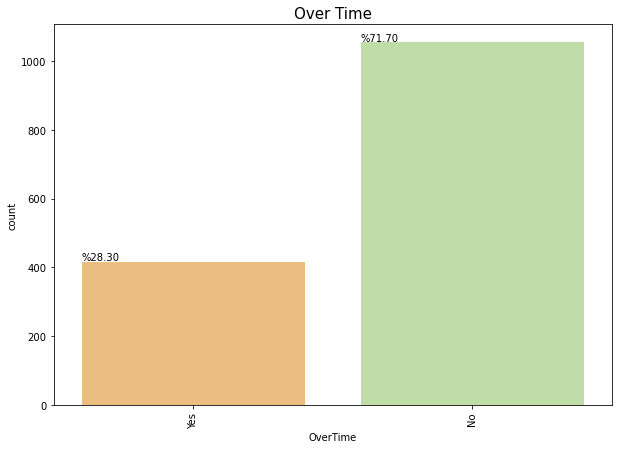

In [532]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='OverTime',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('Over Time',fontsize=15),
plt.xticks(rotation=90)
plt.show()

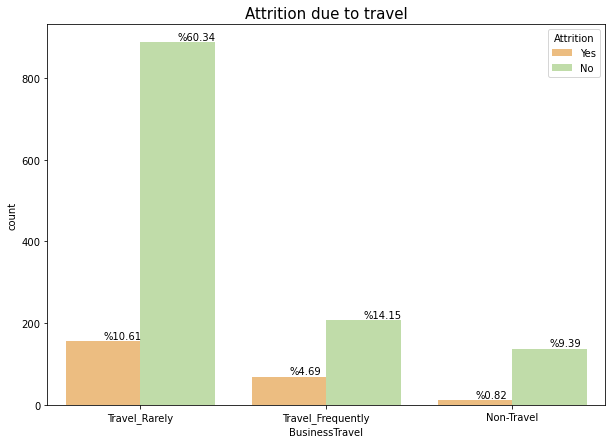

In [533]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x()+0.2, p.get_height()+5))
plt.title('Attrition due to travel',fontsize=15),
plt.show()

##### travel frequently have high attrition in that out of 18% working 5% people leave jobs

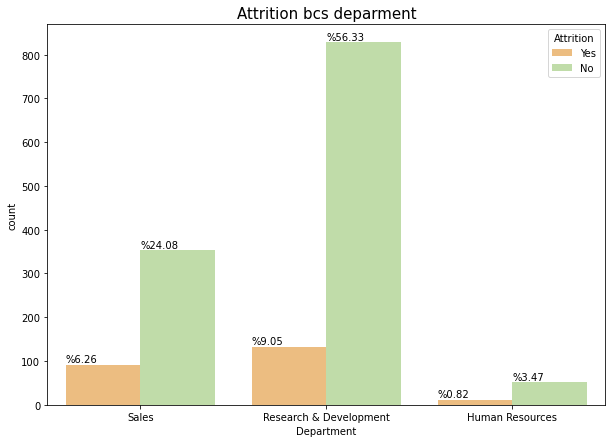

In [534]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Department',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('Attrition bcs deparment',fontsize=15),
plt.show()

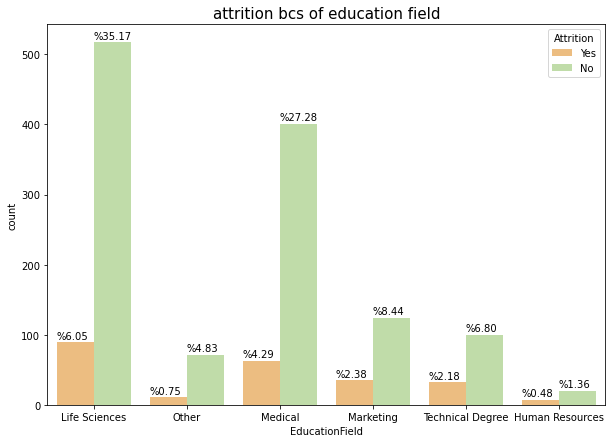

In [535]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='EducationField',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('attrition bcs of education field',fontsize=15),
plt.show()

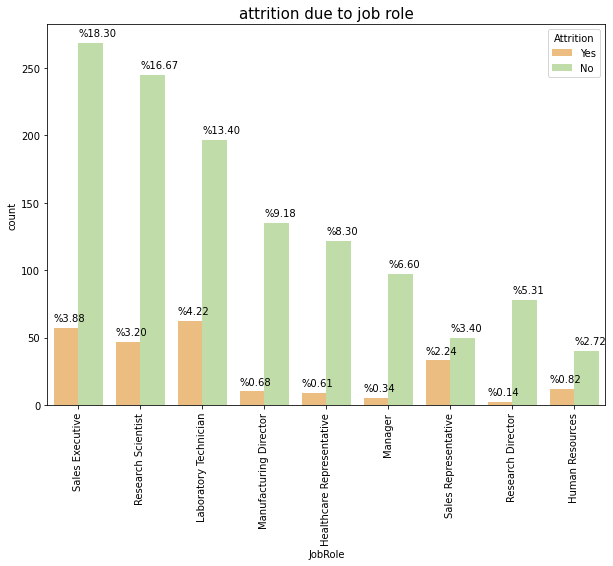

In [536]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='JobRole',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('attrition due to job role',fontsize=15),
plt.xticks(rotation=90)
plt.show()

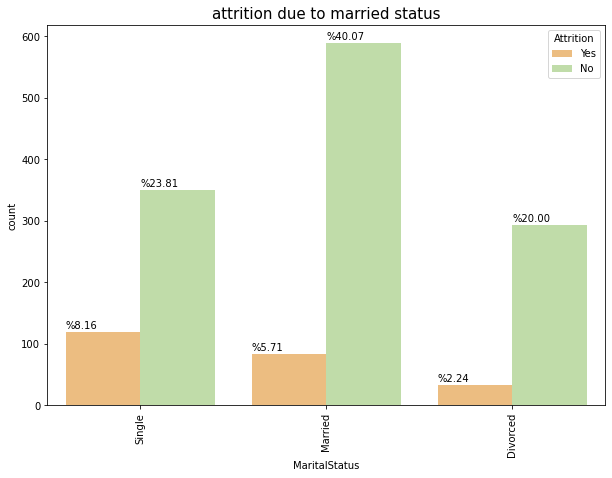

In [537]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='MaritalStatus',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('attrition due to married status',fontsize=15),
plt.xticks(rotation=90)
plt.show()

#### from graph sigle people are changing job frequently

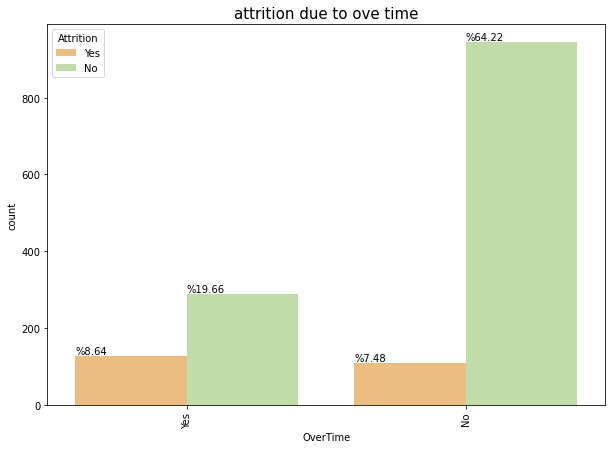

In [538]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='OverTime',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x(), p.get_height()+5))
plt.title('attrition due to ove time',fontsize=15),
plt.xticks(rotation=90)
plt.show()

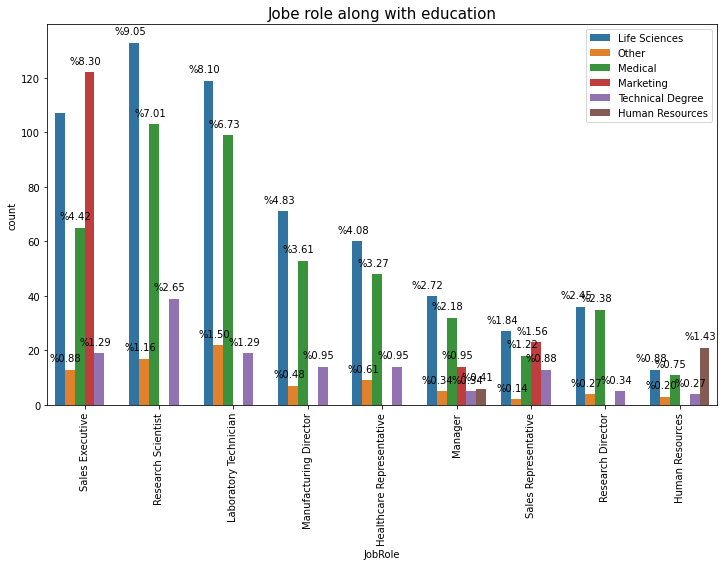

In [539]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x='JobRole',hue='EducationField',data=df)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1470*100), (p.get_x()-0.2, p.get_height()+3))
plt.title('Jobe role along with education',fontsize=15),
plt.legend()
plt.xticks(rotation=90)
plt.show()

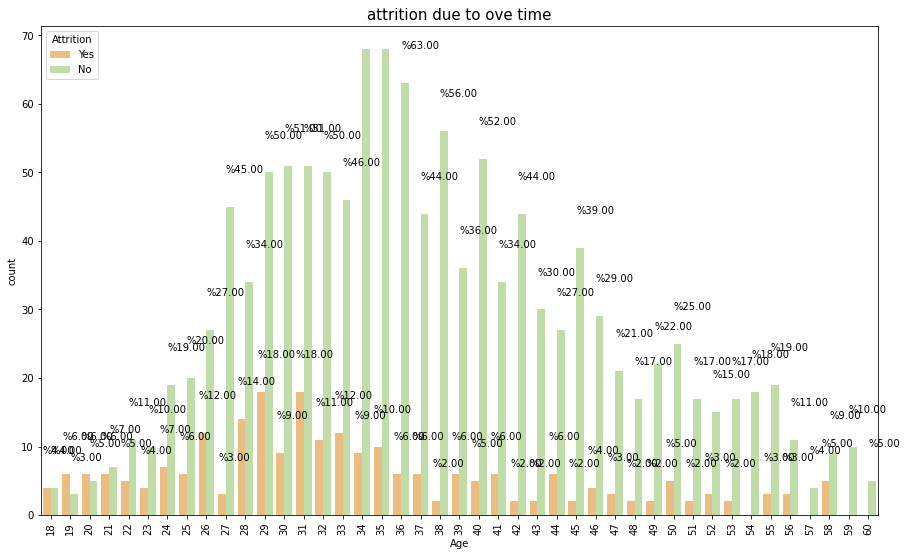

In [540]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='Age',hue='Attrition',data=df,palette='Spectral')
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.title('attrition due to ove time',fontsize=15),
plt.xticks(rotation=90)
plt.show()

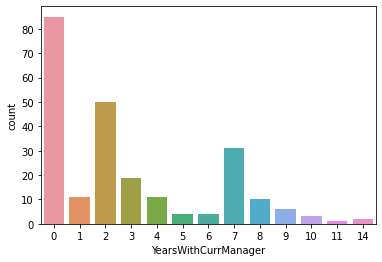

In [541]:
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
# working with current manager position at 0 year most of people leave
# at 2 year some left due salary issue or job role something

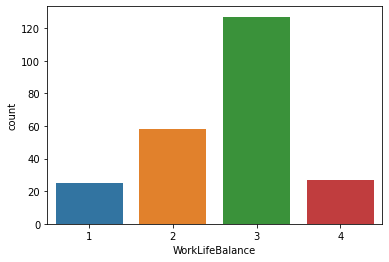

In [542]:
# working balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

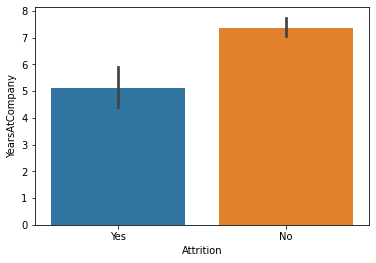

In [543]:
# avg most of 5 years woking in organization they left 
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()

In [544]:
df.loc[df["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"})
# most of people left at starting year of job due salary or job profile
# or some of left after getting promostion in 1 & 2 year

,Attrition
YearsSinceLastPromotion,
0,110
1,49
2,27
3,9
4,5
5,2
6,6
7,16
9,4


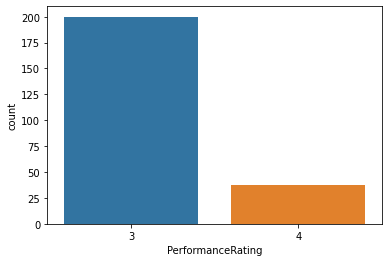

In [545]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
# most of people left due to not satisfied by rating 

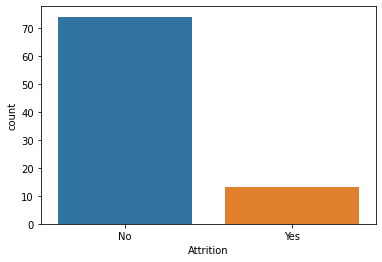

In [546]:
sns.countplot(x="Attrition",data=df.loc[df["DistanceFromHome"]>25])
plt.show()
# distance not affect the attrition

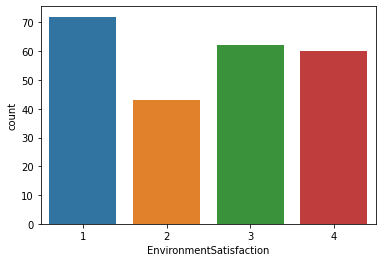

In [547]:
sns.countplot(x="EnvironmentSatisfaction",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
# working environment affect attritionPercentSalaryHike

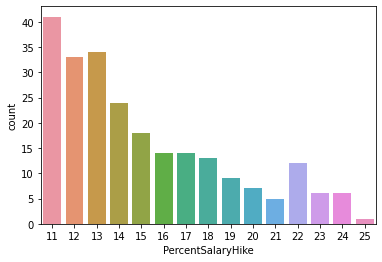

In [548]:
sns.countplot(x="PercentSalaryHike",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
# most candidate left by less increment of salary

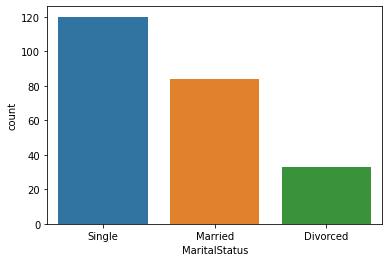

In [549]:
sns.countplot(x="MaritalStatus",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
# most of single/bachlore are switching jobs

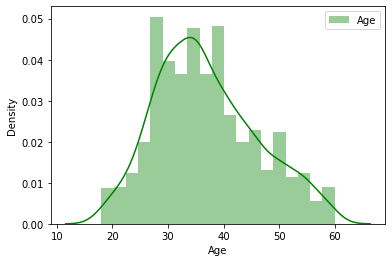

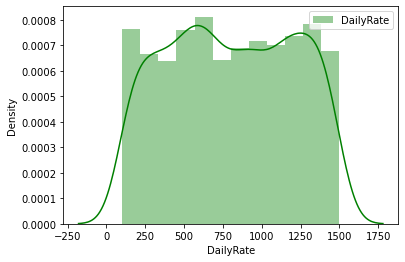

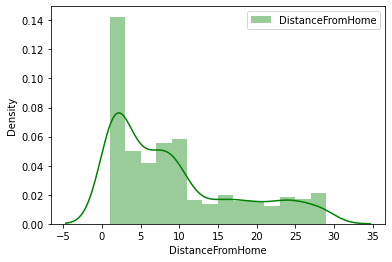

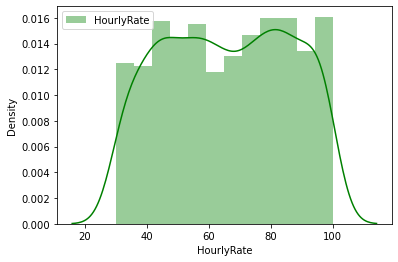

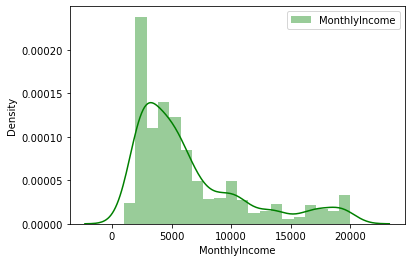

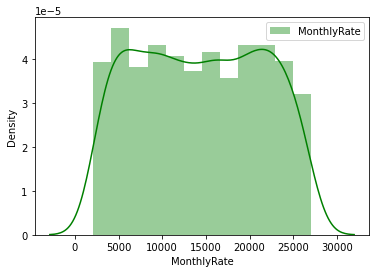

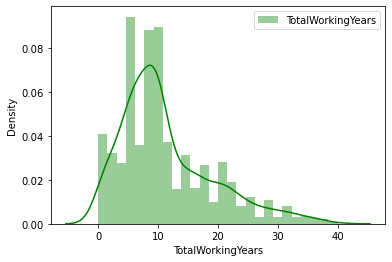

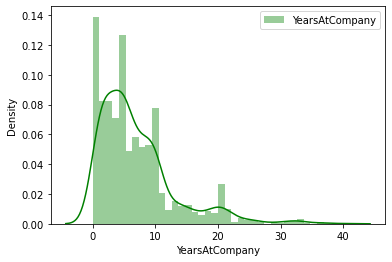

In [550]:
for i in countinus_features:
    plt.plot()
    sns.distplot(df[i],label=i,color='g')
    plt.legend()
    plt.show()

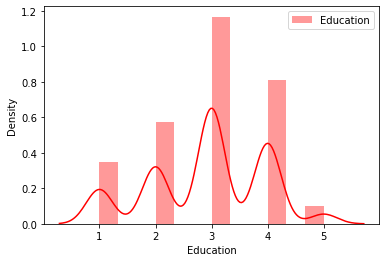

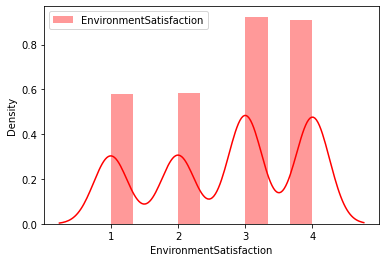

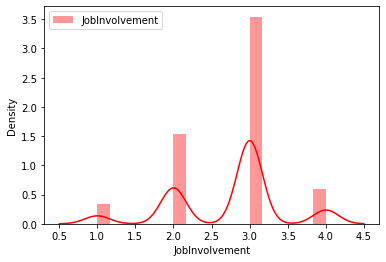

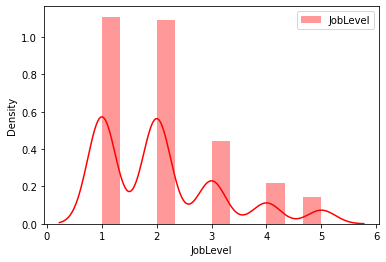

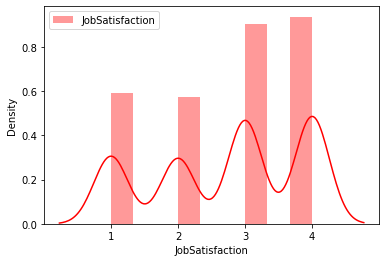

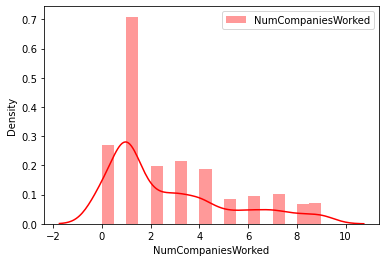

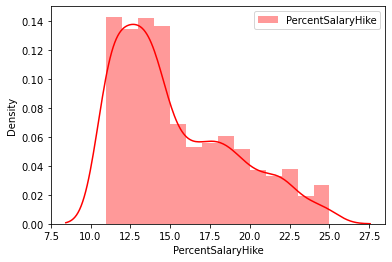

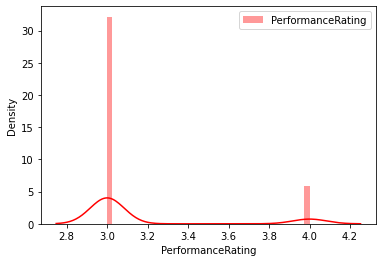

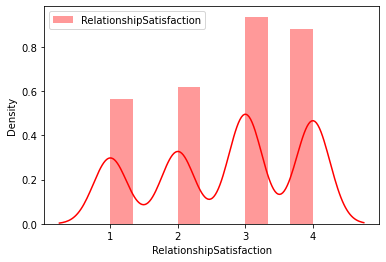

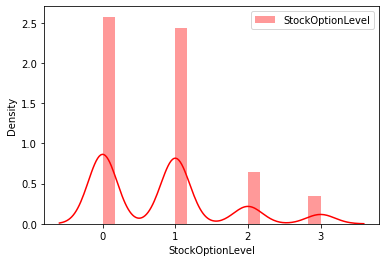

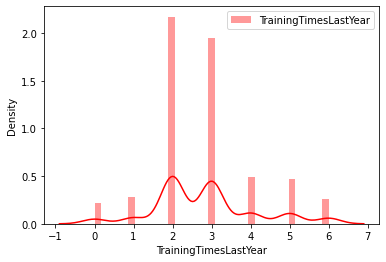

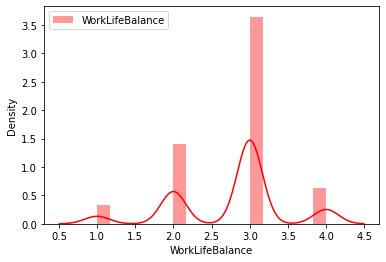

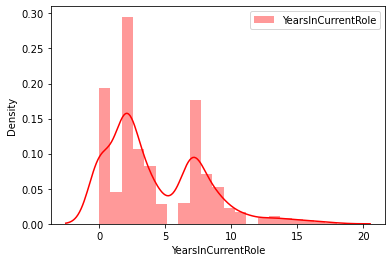

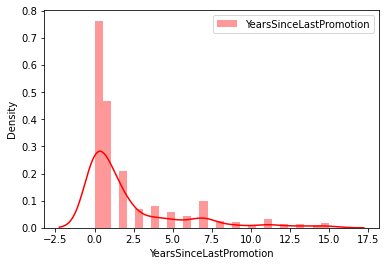

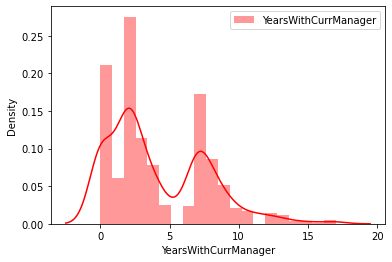

In [551]:
for i in descreate_features:
    plt.plot()
    sns.distplot(df[i],label=i,color='r')
    plt.legend()
    plt.show()

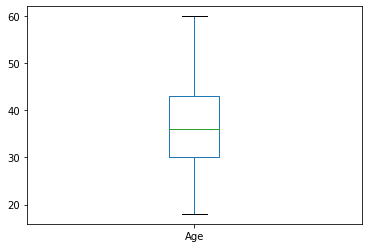

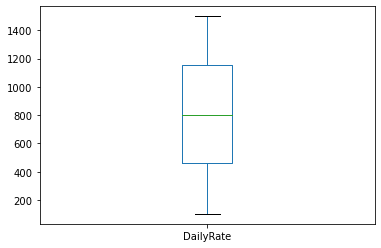

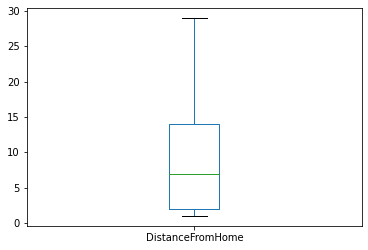

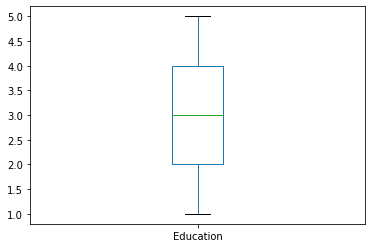

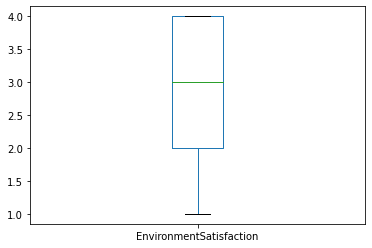

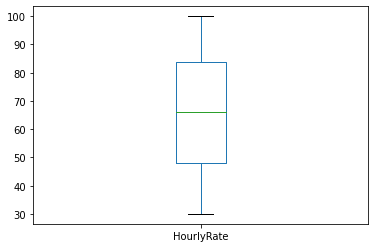

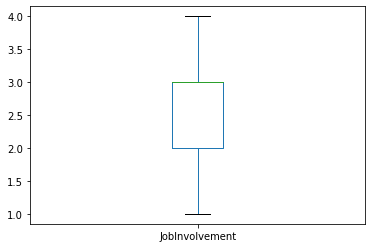

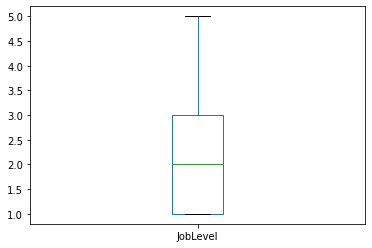

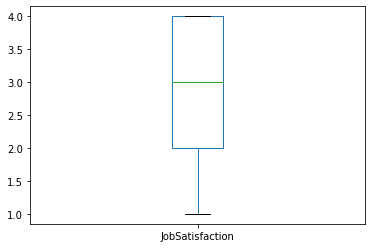

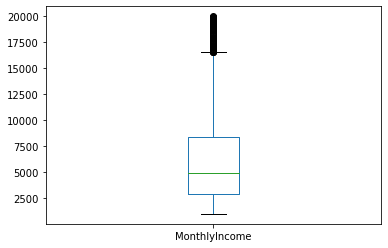

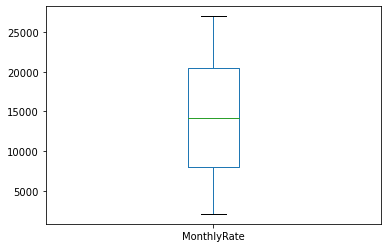

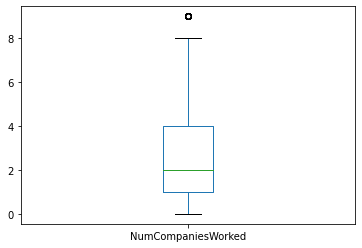

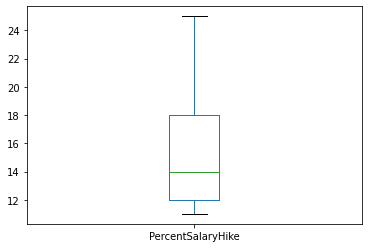

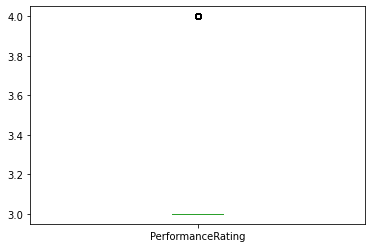

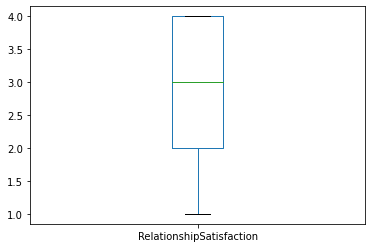

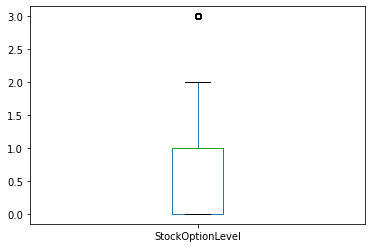

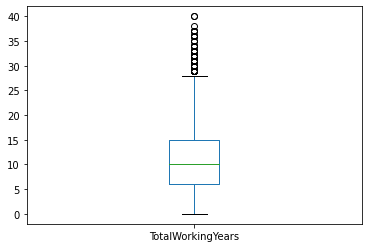

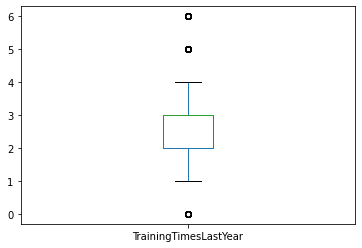

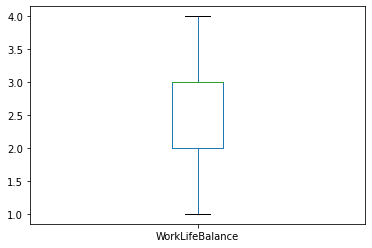

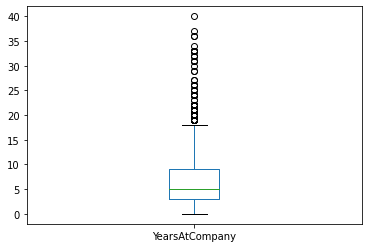

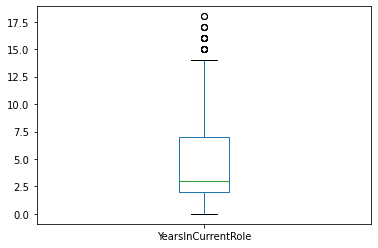

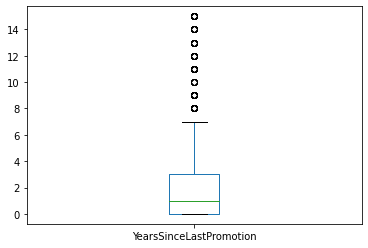

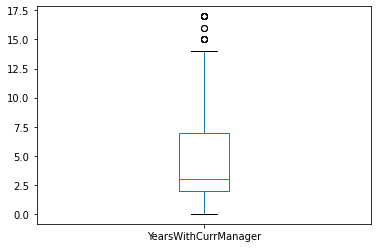

In [552]:
for i in numerical_features:
    df[i].plot(kind='box')
    plt.show()

In [553]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [554]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [555]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [556]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [557]:
df.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
Y

<AxesSubplot:>

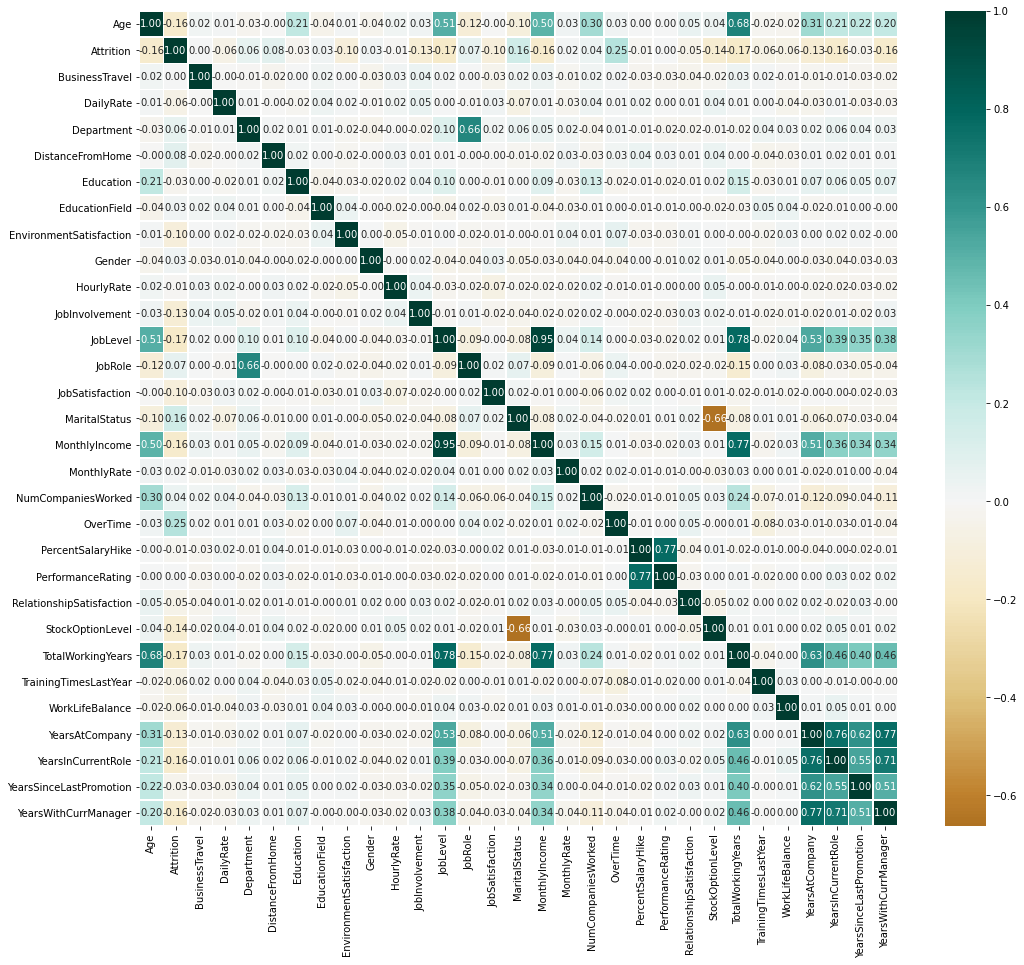

In [558]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',center=0,linewidth=0.5,fmt='0.2f')

In [559]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [560]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [561]:
df_n=df[(z<3).all(axis=1)]

In [562]:
df_n.shape

(1387, 31)

In [563]:
df.shape

(1470, 31)

In [564]:
print("Data loss after outliers remove:",((1470-1384)/1470)*100)

Data loss after outliers remove: 5.850340136054422


In [565]:
x=df_n.drop(columns=['Attrition'])
y=df_n['Attrition']
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [566]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [567]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,30.937930,Age
1,6.667388,BusinessTravel
2,5.041042,DailyRate
3,13.849252,Department
4,2.320873,DistanceFromHome
5,9.339536,Education
6,3.889948,EducationField
7,7.188979,EnvironmentSatisfaction
8,2.531225,Gender
9,11.302474,HourlyRate


#### from the heat map and relation with target column total working years and years in company are correlated idicated employee how many years emplyee worked 
####  so drop total working years in company column
#### Enviroment satisfaction & job satisfaction are indicated same thing so drop one columns bcs both equally correlated with target
#### salary hike and perfoamnce raitng are dependant thing so taking performance rate bcs salary hike negative with target also depand on performance
#### year in current role that indicate employee present in company so related with Years with manager so drop one that column
#### monthly rate also include daily rate bcs days in month daily rate negative with target so drop 
#### Job level increase with performance rating it id depenfd on that 
#### Work life balance also involve jobinvelment how employee balancing with work and personal life

In [568]:
x1=x.drop(columns=['TotalWorkingYears','EnvironmentSatisfaction','PercentSalaryHike','YearsWithCurrManager','DailyRate','JobLevel','JobInvolvement'],axis=1)
x1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,2,2,1,2,1,0,94,7,4,...,8,1,3,1,0,0,1,6,4,0
1,49,1,1,8,1,1,1,61,6,2,...,1,0,4,4,1,3,3,10,7,1
2,37,2,1,2,2,4,1,92,2,3,...,6,1,3,2,0,3,3,0,0,0
3,33,1,1,3,4,1,0,56,6,3,...,1,1,3,3,0,3,3,8,7,3
4,27,2,1,2,1,3,1,40,2,2,...,9,0,3,4,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,23,2,3,1,41,2,4,...,4,0,3,3,1,3,3,5,2,0
1466,39,2,1,6,1,3,1,42,0,1,...,4,0,3,1,1,5,3,7,7,1
1467,27,2,1,4,3,1,1,87,4,2,...,1,1,4,2,1,0,3,6,2,0
1468,49,1,2,2,3,3,1,63,7,2,...,2,0,3,4,0,3,2,9,6,0


In [569]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif['columns']=x1.columns
vif

,vif,columns
0,23.551275,Age
1,6.573250,BusinessTravel
2,12.934444,Department
3,2.306469,DistanceFromHome
4,9.256120,Education
5,3.835257,EducationField
6,2.522442,Gender
7,11.035472,HourlyRate
8,8.275736,JobRole
9,7.031220,JobSatisfaction


In [570]:
x1.skew()

Age                         0.472280
BusinessTravel             -1.426774
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
Gender                     -0.417296
HourlyRate                 -0.030481
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
dtype: float64

In [571]:
from sklearn.preprocessing import power_transform,StandardScaler

from sklearn.preprocessing import power_transform
x2=power_transform(x1,method='yeo-johnson')
x2=pd.DataFrame(x2)

In [573]:
for index in x1.skew().index:
    if x1.skew().loc[index]>0.5:
        x1[index]=np.log1p(x1[index])
    if x1.skew().loc[index]<-0.5:
        x1[index]=np.log1p(x1[index])

In [574]:
# skewness remove from countinus columns
x1.skew()

Age                         0.472280
BusinessTravel             -1.802347
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField             -0.055326
Gender                     -0.417296
HourlyRate                 -0.030481
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TrainingTimesLastYear      -2.240053
WorkLifeBalance            -1.219886
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
dtype: float64

In [576]:
sc=StandardScaler()
sc.fit_transform(x1)

array([[ 0.5366811 ,  0.55017287,  1.40537338, ...,  0.29775084,
         0.37256681, -0.96408623],
       [ 1.44211114, -0.62298095, -0.49633675, ...,  0.93917603,
         0.98090913, -0.02809563],
       [ 0.08396607,  0.55017287, -0.49633675, ..., -2.46374663,
        -1.7105856 , -0.96408623],
       ...,
       [-1.04782149,  0.55017287, -0.49633675, ...,  0.29775084,
        -0.28861286, -0.96408623],
       [ 1.44211114, -0.62298095,  1.40537338, ...,  0.80391859,
         0.80807473, -0.96408623],
       [-0.2555702 ,  0.55017287, -0.49633675, ..., -0.17974666,
         0.08374422, -0.02809563]])

In [577]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x3,y3=sm.fit_resample(x,y)

In [579]:
np.bincount(y)

array([1158,  229], dtype=int64)

In [578]:
y3.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

In [611]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score
lg=LogisticRegression()

In [601]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.3,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(f1_score(y_train,pred_tr)*100,1)==round(f1_score(y_test,pred_te)*100,1):
        print('\n Random State',i)
        print('f1_score TR',f1_score(y_train,pred_tr)*100)
        print('f1_score TE',f1_score(y_test,pred_te)*100)


 Random State 119
f1_score TR 67.71273385636692
f1_score TE 67.69662921348313

 Random State 153
f1_score TR 68.44014510278113
f1_score TE 68.43575418994413

 Random State 315
f1_score TR 68.02952867688812
f1_score TE 68.0161943319838

 Random State 366
f1_score TR 68.26863832409119
f1_score TE 68.31955922865014

 Random State 449
f1_score TR 68.01968019680199
f1_score TE 67.97202797202797


In [602]:
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.3,random_state=153)
lg.fit(x_train,y_train)
predict=lg.predict(x_test)
print('Train score:',lg.score(x_train,y_train)*100)
print('f1 Score: ',f1_score(y_test,predict)*100)
print('accuracy score',accuracy_score(y_test,predict)*100)
print('Confusion matrix \n',confusion_matrix(y_test,predict))
print('Classification report \n',classification_report(y_test,predict))

Train score: 67.79765576804442
f1 Score:  68.43575418994413
accuracy score 67.4820143884892
Confusion matrix 
 [[224 126]
 [100 245]]
Classification report 
               precision    recall  f1-score   support

           0       0.69      0.64      0.66       350
           1       0.66      0.71      0.68       345

    accuracy                           0.67       695
   macro avg       0.68      0.68      0.67       695
weighted avg       0.68      0.67      0.67       695



In [585]:
dtc=DecisionTreeClassifier()
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
kn=KNeighborsClassifier()
sgd=SGDClassifier()
xgb=XGBClassifier()
xgbr=XGBRFClassifier()

In [586]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('F1 score:\n',f1_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

In [587]:
classifiers(dtc)

DecisionTreeClassifier() 
 100.0
Accuracy score:
 81.15107913669065
F1 score:
 81.67832167832168
Confusion matrix:
 [[272  78]
 [ 53 292]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       350
           1       0.79      0.85      0.82       345

    accuracy                           0.81       695
   macro avg       0.81      0.81      0.81       695
weighted avg       0.81      0.81      0.81       695



In [588]:
classifiers(svc)

SVC() 
 60.39481801357187
Accuracy score:
 60.86330935251798
F1 score:
 65.3061224489796
Confusion matrix:
 [[167 183]
 [ 89 256]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.48      0.55       350
           1       0.58      0.74      0.65       345

    accuracy                           0.61       695
   macro avg       0.62      0.61      0.60       695
weighted avg       0.62      0.61      0.60       695



In [589]:
classifiers(svcl)

SVC(kernel='linear') 
 81.43121529919803
Accuracy score:
 81.43884892086331
F1 score:
 81.80535966149506
Confusion matrix:
 [[276  74]
 [ 55 290]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       350
           1       0.80      0.84      0.82       345

    accuracy                           0.81       695
   macro avg       0.82      0.81      0.81       695
weighted avg       0.82      0.81      0.81       695



In [590]:
classifiers(svcp)

SVC(kernel='poly') 
 56.81677976557681
Accuracy score:
 55.827338129496404
F1 score:
 66.73889490790899
Confusion matrix:
 [[ 80 270]
 [ 37 308]]
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.23      0.34       350
           1       0.53      0.89      0.67       345

    accuracy                           0.56       695
   macro avg       0.61      0.56      0.51       695
weighted avg       0.61      0.56      0.50       695



In [591]:
classifiers(kn)

KNeighborsClassifier() 
 82.97347316471314
Accuracy score:
 73.81294964028777
F1 score:
 76.96202531645571
Confusion matrix:
 [[209 141]
 [ 41 304]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.60      0.70       350
           1       0.68      0.88      0.77       345

    accuracy                           0.74       695
   macro avg       0.76      0.74      0.73       695
weighted avg       0.76      0.74      0.73       695



In [592]:
classifiers(sgd)

SGDClassifier() 
 49.84577421344849
Accuracy score:
 50.35971223021583
F1 score:
 0.0
Confusion matrix:
 [[350   0]
 [345   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       350
           1       0.00      0.00      0.00       345

    accuracy                           0.50       695
   macro avg       0.25      0.50      0.33       695
weighted avg       0.25      0.50      0.34       695



In [593]:
classifiers(xgb)

[12:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 100.0
Accuracy score:
 91.65467625899281
F1 score:
 91.73789173789173
Confusion matrix:
 [[315  35]
 [ 23 

In [594]:
classifiers(xgbr)

[12:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None) 
 93.64589759407774
Accuracy score:
 88.77697841726618
F1 score:
 89.01408450704226
Confusion matrix:
 [[301  49]
 [ 29 316]]
Classific

In [595]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [606]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: \n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 

 score: 
 100.0
 F1 score: 94.0
Accuracy scoer:
 93.9568345323741
Confusion_matrix:
 [[324  26]
 [ 16 329]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       350
           1       0.93      0.95      0.94       345

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695



AdaBoostClassifier() 

 score: 
 88.46391116594695
 F1 score: 86.83473389355744
Accuracy scoer:
 86.47482014388488
Confusion_matrix:
 [[291  59]
 [ 35 310]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       350
           1       0.84      0.90      0.87       345

    accuracy                           0.86       695
   macro avg       0.87      0.86      0.86       695
weighted avg       0.87      0.86      0.86       695



Gr

In [655]:
parameters={"n_estimators":[1000,500,100],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x3,y3)
clf.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 500}

In [663]:
rf=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=2000,class_weight='balanced')
rf.fit(x_train,y_train)
print(rf,'\n\n score: \n',rf.score(x_train,y_train)*100)
pred_rf=rf.predict(x_test)
print(' F1 score:',f1_score(y_test,pred_rf)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_rf)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_rf))
print('Classification report:\n',classification_report(y_test,pred_rf))

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=2000) 

 score: 
 100.0
 F1 score: 93.58059914407988
Accuracy scoer:
 93.5251798561151
Confusion_matrix:
 [[322  28]
 [ 17 328]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       350
           1       0.92      0.95      0.94       345

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695



In [665]:
for i in range(2,15):
    crs_score=cross_val_score(rf,x3,y3,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',f1_score(y_test,pred_rf)*100)

cv value: 2
cross value score: 89.68048359240069
actual score: 93.58059914407988
cv value: 3
cross value score: 90.32815198618307
actual score: 93.58059914407988
cv value: 4
cross value score: 90.71675302245251
actual score: 93.58059914407988
cv value: 5
cross value score: 90.98225590228644
actual score: 93.58059914407988
cv value: 6
cross value score: 91.62348877374782
actual score: 93.58059914407988
cv value: 7
cross value score: 91.75396607420777
actual score: 93.58059914407988
cv value: 8
cross value score: 92.27583223958955
actual score: 93.58059914407988
cv value: 9
cross value score: 92.3214590936969
actual score: 93.58059914407988
cv value: 10
cross value score: 91.93032542170474
actual score: 93.58059914407988
cv value: 11
cross value score: 92.44927268623951
actual score: 93.58059914407988
cv value: 12
cross value score: 92.44386873920553
actual score: 93.58059914407988
cv value: 13
cross value score: 92.36780732292628
actual score: 93.58059914407988
cv value: 14
cross value 

In [666]:
scores=cross_val_score(rf,x3,y3,cv=11,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

CV mean 0.9790396844844285
std: 0.028610986968785227


In [630]:
parameters={"n_estimators":[500,200,100,50],'learning_rate':[0.1,0.01,0.001,1],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x3,y3)
clf.best_params_

{'learning_rate': 1, 'max_features': 'log2', 'n_estimators': 500}

In [644]:
gd=GradientBoostingClassifier(learning_rate=1,max_features='log2',n_estimators=500)
gd.fit(x_train,y_train)
print(gd,'\n\n score: \n',gd.score(x_train,y_train)*100)
pred_gd=gd.predict(x_test)
print(' F1 score:',f1_score(y_test,pred_gd)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_gd)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_gd))
print('Classification report:\n',classification_report(y_test,pred_gd))

GradientBoostingClassifier(learning_rate=1, max_features='log2',
                           n_estimators=500) 

 score: 
 100.0
 F1 score: 91.3963328631876
Accuracy scoer:
 91.22302158273381
Confusion_matrix:
 [[310  40]
 [ 21 324]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       350
           1       0.89      0.94      0.91       345

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



In [646]:
for i in range(2,15):
    crs_score=cross_val_score(gd,x3,y3,cv=i,scoring='roc_auc')
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',f1_score(y_test,pred_gd)*100)

cv value: 2
cross value score: 95.46460605952136
actual score: 91.3963328631876
cv value: 3
cross value score: 96.07058802473443
actual score: 91.3963328631876
cv value: 4
cross value score: 96.48490633575946
actual score: 91.3963328631876
cv value: 5
cross value score: 96.65055515233874
actual score: 91.3963328631876
cv value: 6
cross value score: 88.27731393236508
actual score: 91.3963328631876
cv value: 7
cross value score: 92.22121069875725
actual score: 91.3963328631876
cv value: 8
cross value score: 97.63006589377726
actual score: 91.3963328631876
cv value: 9
cross value score: 91.59747156454272
actual score: 91.3963328631876
cv value: 10
cross value score: 97.37640877836944
actual score: 91.3963328631876
cv value: 11
cross value score: 97.50173276857915
actual score: 91.3963328631876
cv value: 12
cross value score: 97.11930841924398
actual score: 91.3963328631876
cv value: 13
cross value score: 97.10938250264091
actual score: 91.3963328631876
cv value: 14
cross value score: 97.5

In [642]:
scores=cross_val_score(gd,x3,y3,cv=13,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

CV mean 0.9764256433995104
std: 0.02880195273284646


In [625]:
from sklearn.metrics import roc_auc_score,roc_curve
import joblib

AUC roc score:  0.9353623188405799


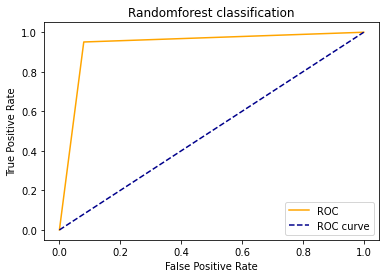

In [668]:
fpr, tpr, threshold = roc_curve(y_test,pred_rf)
print('AUC roc score: ',roc_auc_score(y_test,pred_rf))
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Randomforest classification')
plt.legend()
plt.show()


In [669]:
joblib.dump(rf,'HRanalysis.obj')
HRanaltsis=joblib.load('HRanalysis.obj')
pd.DataFrame({'Actual':y_test,'Predicted':pred_rf})

,Actual,Predicted
1889,1,1
486,0,1
945,0,0
463,0,0
1936,1,1
...,...,...
310,0,0
1593,1,1
899,0,0
1816,1,1
